In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
test_df = pd.read_csv("./bike-sharing-demand/test.csv", parse_dates=["datetime"])
train_df = pd.read_csv("./bike-sharing-demand/train.csv", parse_dates=["datetime"])

In [4]:
all_df = pd.concat((train_df, test_df), axis=0).reset_index()
all_df.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,index,atemp,casual,count,datetime,holiday,humidity,registered,season,temp,weather,windspeed,workingday
0,0,14.395,3.0,16.0,2011-01-01 00:00:00,0,81,13.0,1,9.84,1,0.0,0
1,1,13.635,8.0,40.0,2011-01-01 01:00:00,0,80,32.0,1,9.02,1,0.0,0
2,2,13.635,5.0,32.0,2011-01-01 02:00:00,0,80,27.0,1,9.02,1,0.0,0
3,3,14.395,3.0,13.0,2011-01-01 03:00:00,0,75,10.0,1,9.84,1,0.0,0
4,4,14.395,0.0,1.0,2011-01-01 04:00:00,0,75,1.0,1,9.84,1,0.0,0


In [5]:
all_df.tail()

,index,atemp,casual,count,datetime,holiday,humidity,registered,season,temp,weather,windspeed,workingday
17374,6488,12.880,NaN,NaN,2012-12-31 19:00:00,0,60,NaN,1,10.66,2,11.0014,1
17375,6489,12.880,NaN,NaN,2012-12-31 20:00:00,0,60,NaN,1,10.66,2,11.0014,1
17376,6490,12.880,NaN,NaN,2012-12-31 21:00:00,0,60,NaN,1,10.66,1,11.0014,1
17377,6491,13.635,NaN,NaN,2012-12-31 22:00:00,0,56,NaN,1,10.66,1,8.9981,1
17378,6492,13.635,NaN,NaN,2012-12-31 23:00:00,0,65,NaN,1,10.66,1,8.9981,1


In [7]:
train_index = list(range(len(train_df)))
test_index = list(range(len(train_df), len(all_df)))

In [8]:
all_df.isnull().sum()

index            0
atemp            0
casual        6493
count         6493
datetime         0
holiday          0
humidity         0
registered    6493
season           0
temp             0
weather          0
windspeed        0
workingday       0
dtype: int64

In [10]:
x = np.array([np.inf, -np.inf, np.nan, -128, 128])
np.nan_to_num(x)

array([ 1.79769313e+308, -1.79769313e+308,  0.00000000e+000,
       -1.28000000e+002,  1.28000000e+002])

In [11]:
def rmsle(y, y_):
    log1 = np.nan_to_num(np.log(y + 1))
    log2 = np.nan_to_num(np.log(y_ + 1))
    calc = (log1 - log2) **2
    return np.sqrt(np.mean(calc))

In [12]:
submission_df = pd.read_csv("./bike-sharing-demand/sampleSubmission.csv")
submission_df.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [13]:
rmsle(submission_df["count"].values,
      np.random.randint(0, 100, size=len(submission_df)))

3.7520059534496237

In [15]:
del all_df["casual"]
del all_df["registered"]
del all_df["index"]

In [18]:
pre_df = all_df.merge(pd.get_dummies(all_df["season"], prefix="season"), left_index=True, right_index=True)
pre_df.head()

,atemp,count,datetime,holiday,humidity,season,temp,weather,windspeed,workingday,season_1,season_2,season_3,season_4
0,14.395,16.0,2011-01-01 00:00:00,0,81,1,9.84,1,0.0,0,1,0,0,0
1,13.635,40.0,2011-01-01 01:00:00,0,80,1,9.02,1,0.0,0,1,0,0,0
2,13.635,32.0,2011-01-01 02:00:00,0,80,1,9.02,1,0.0,0,1,0,0,0
3,14.395,13.0,2011-01-01 03:00:00,0,75,1,9.84,1,0.0,0,1,0,0,0
4,14.395,1.0,2011-01-01 04:00:00,0,75,1,9.84,1,0.0,0,1,0,0,0


In [19]:
pre_df = pre_df.merge(pd.get_dummies(all_df["weather"], prefix="weather"), left_index=True, right_index=True)
pre_df.head()

,atemp,count,datetime,holiday,humidity,season,temp,weather,windspeed,workingday,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,14.395,16.0,2011-01-01 00:00:00,0,81,1,9.84,1,0.0,0,1,0,0,0,1,0,0,0
1,13.635,40.0,2011-01-01 01:00:00,0,80,1,9.02,1,0.0,0,1,0,0,0,1,0,0,0
2,13.635,32.0,2011-01-01 02:00:00,0,80,1,9.02,1,0.0,0,1,0,0,0,1,0,0,0
3,14.395,13.0,2011-01-01 03:00:00,0,75,1,9.84,1,0.0,0,1,0,0,0,1,0,0,0
4,14.395,1.0,2011-01-01 04:00:00,0,75,1,9.84,1,0.0,0,1,0,0,0,1,0,0,0


In [20]:
pre_df["datetime"].unique()

array(['2011-01-01T00:00:00.000000000', '2011-01-01T01:00:00.000000000',
       '2011-01-01T02:00:00.000000000', ...,
       '2012-12-31T21:00:00.000000000', '2012-12-31T22:00:00.000000000',
       '2012-12-31T23:00:00.000000000'], dtype='datetime64[ns]')

In [21]:
pre_df["year"] = pre_df["datetime"].dt.year
pre_df["month"] = pre_df["datetime"].dt.month
pre_df["day"] = pre_df["datetime"].dt.day
pre_df["hour"] = pre_df["datetime"].dt.hour
pre_df["weekday"] = pre_df["datetime"].dt.weekday

In [22]:
pre_df = pre_df.merge(pd.get_dummies(pre_df["weekday"], prefix="weekday"), left_index=True, right_index=True)
pre_df.head()

,atemp,count,datetime,holiday,humidity,season,temp,weather,windspeed,workingday,...,day,hour,weekday,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,14.395,16.0,2011-01-01 00:00:00,0,81,1,9.84,1,0.0,0,...,1,0,5,0,0,0,0,0,1,0
1,13.635,40.0,2011-01-01 01:00:00,0,80,1,9.02,1,0.0,0,...,1,1,5,0,0,0,0,0,1,0
2,13.635,32.0,2011-01-01 02:00:00,0,80,1,9.02,1,0.0,0,...,1,2,5,0,0,0,0,0,1,0
3,14.395,13.0,2011-01-01 03:00:00,0,75,1,9.84,1,0.0,0,...,1,3,5,0,0,0,0,0,1,0
4,14.395,1.0,2011-01-01 04:00:00,0,75,1,9.84,1,0.0,0,...,1,4,5,0,0,0,0,0,1,0


In [24]:
pre_df.dtypes

atemp                float64
count                float64
datetime      datetime64[ns]
holiday                int64
humidity               int64
season                 int64
temp                 float64
weather                int64
windspeed            float64
workingday             int64
season_1               uint8
season_2               uint8
season_3               uint8
season_4               uint8
weather_1              uint8
weather_2              uint8
weather_3              uint8
weather_4              uint8
year                   int64
month                  int64
day                    int64
hour                   int64
weekday                int64
weekday_0              uint8
weekday_1              uint8
weekday_2              uint8
weekday_3              uint8
weekday_4              uint8
weekday_5              uint8
weekday_6              uint8
dtype: object

In [25]:
category_variable_list = ["season", "weather", "workingday", "season_1", "season_2", "season_3", "season_4",
                          "weather_1", "weather_2", "weather_3", "weather_4",
                          "year", "month", "day", "hour", "weekday", 
                          "weekday_0", "weekday_1", "weekday_2", "weekday_3", "weekday_4", "weekday_5", "weekday_6"]

for var_name in category_variable_list:
    pre_df[var_name] = pre_df[var_name].astype("category")

In [26]:
pre_df.dtypes

atemp                float64
count                float64
datetime      datetime64[ns]
holiday                int64
humidity               int64
season              category
temp                 float64
weather             category
windspeed            float64
workingday          category
season_1            category
season_2            category
season_3            category
season_4            category
weather_1           category
weather_2           category
weather_3           category
weather_4           category
year                category
month               category
day                 category
hour                category
weekday             category
weekday_0           category
weekday_1           category
weekday_2           category
weekday_3           category
weekday_4           category
weekday_5           category
weekday_6           category
dtype: object

In [27]:
train_df = pre_df.iloc[train_index]

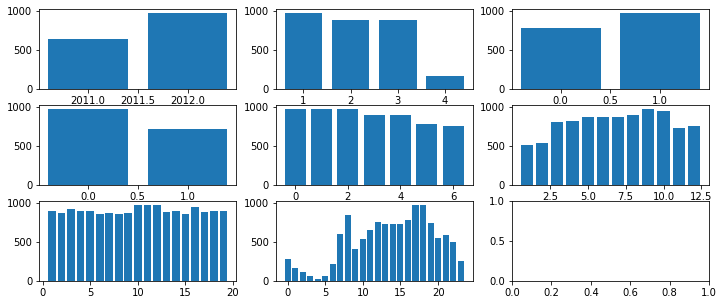

In [29]:
f, ax = plt.subplots(3, 3)
f.set_size_inches(12, 5)
ax[0, 0].bar(train_df["year"], train_df["count"])
ax[0, 1].bar(train_df["weather"], train_df["count"])
ax[0, 2].bar(train_df["workingday"], train_df["count"])
ax[1, 0].bar(train_df["holiday"], train_df["count"])
ax[1, 1].bar(train_df["weekday"], train_df["count"])
ax[1, 2].bar(train_df["month"], train_df["count"])
ax[2, 0].bar(train_df["day"], train_df["count"])
ax[2, 1].bar(train_df["hour"], train_df["count"])
plt.show()

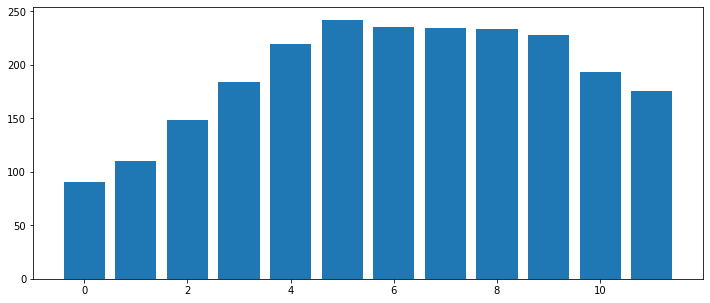

In [30]:
series_data = train_df.groupby(["month"])["count"].mean()
series_data.index.tolist()[:5]
f, ax = plt.subplots()
ax.bar(range(len(series_data)), series_data)
f.set_size_inches(12, 5)
plt.show()

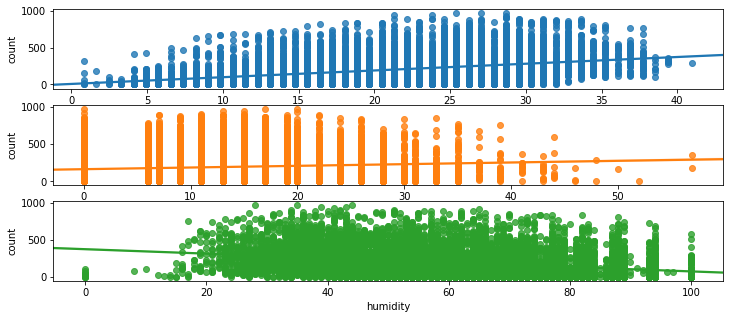

In [31]:
import seaborn as sns

f, ax = plt.subplots(3)
f.set_size_inches(12, 5)
sns.regplot(x="temp", y="count", data=train_df, ax=ax[0])
sns.regplot(x="windspeed", y="count", data=train_df, ax=ax[1])
sns.regplot(x="humidity", y="count", data=train_df, ax=ax[2])
plt.show()

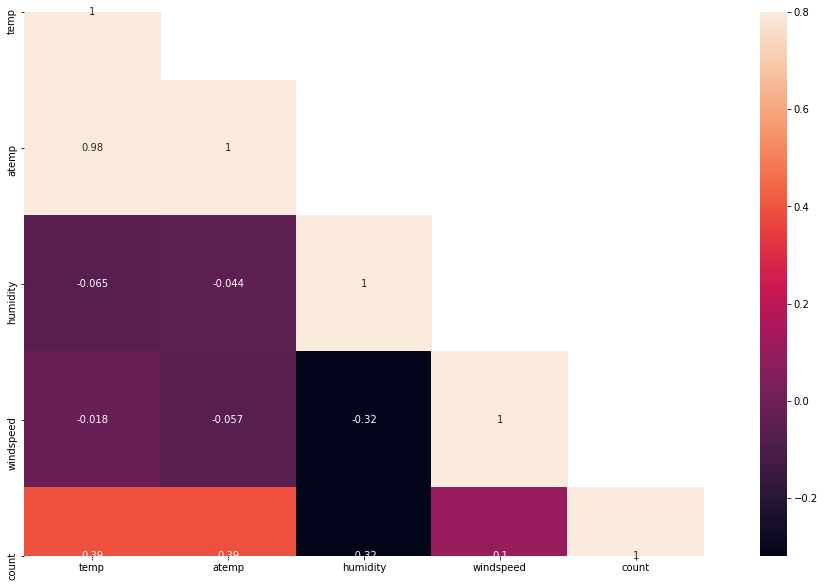

In [34]:
corrMatt = train_df[["temp", "atemp", "humidity", "windspeed", "count"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
f, ax = plt.subplots()
f.set_size_inches(20, 10)
sns.heatmap(corrMatt, mask=mask, vmax=.8, square=True, annot=True)
plt.show()